In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FBI=pd.read_excel('FBI_gun_murders_2019.xls',header=3,skipfooter=5)
FBI.drop(FBI.columns[3:], axis=1, inplace=True)
FBI.rename(columns={'Total\nmurders1':'Murders','Total\nfirearms':'Gun_Murders'}, inplace=True)
FBI['State']=FBI['State'].str.replace('\d+','')

C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [3]:
census=pd.read_excel('nst-est2019-01.xlsx',header=3,skiprows=range(4,9),skipfooter=7)
census.rename(columns={census.columns[0]:'State'}, inplace=True)
census['State']=census['State'].str.replace('.','')

C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
RAND=pd.read_excel('TL-354-State-Level Estimates of Household Firearm Ownership.xlsx',sheet_name='State-Level Data & Factor Score')

In [5]:
RAND_2016=RAND[RAND.Year == 2016].copy().reset_index()

In [6]:
def plot_rand(year):
    RAND_year=RAND[RAND.Year == year]
    
    plt.figure(figsize=(20,5))
    plt.bar(RAND_year.sort_values(by=['HFR']).STATE,RAND_year.sort_values(by=['HFR']).HFR,width=.3,)
    plt.xticks(rotation=90)

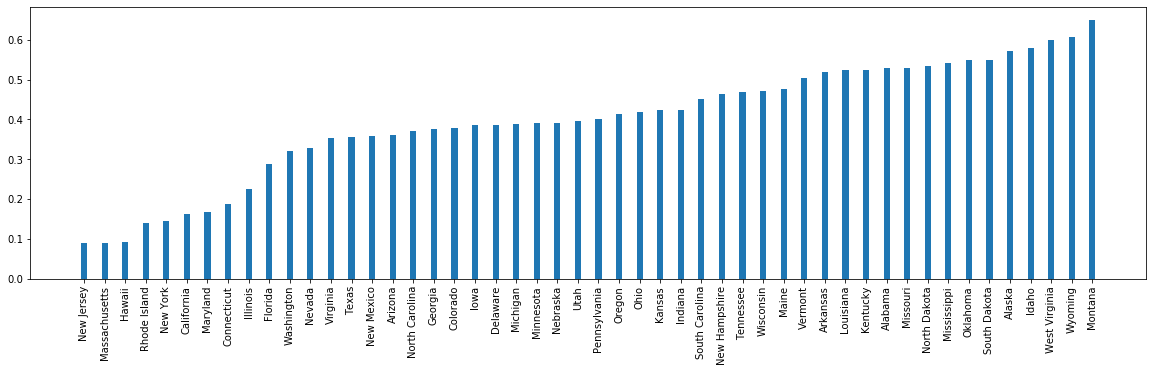

In [7]:
plot_rand(2016)

In [8]:
murder_2019=pd.concat([FBI,census[2019]], axis=1, join='outer')
murder_2019['Murders_per_100k']=murder_2019['Murders']/(murder_2019[2019]/100000)
murder_2019['Gun_Murders_per_100k']=murder_2019['Gun_Murders']/(murder_2019[2019]/100000)

In [23]:
urb_den=pd.read_excel('pop-urban-pct-historical.xls',sheet_name='States',header=5,skipfooter=7)
urb_den.drop(urb_den.columns[0], axis=1, inplace=True)
urb_den.drop(urb_den.columns[1:14], axis=1, inplace=True)
urb_den

,Area Name,2010
0,United States,80.7
1,Alabama,59.0
2,Alaska,66.0
3,Arizona,89.8
4,Arkansas,56.2
5,California,95.0
6,Colorado,86.2
7,Connecticut,88.0
8,Delaware,83.3
9,District of Columbia,100.0


In [41]:
fox_data=pd.concat([murder_2019.drop(labels=8).reset_index(),RAND_2016.HFR,urb_den[2010].drop(labels={0,9}).reset_index()], axis=1, join='outer').drop(columns='index')
fox_data.rename(columns={2019:'Pop_2019',2010:'Urban_per'}, inplace=True)
fox_data['HFR_per']=fox_data['HFR']*100
fox_data['Urb_Murd']=fox_data.Murders_per_100k/(fox_data.Urban_per/100)
#Alabama, Florida, and Illonois are dropped because the FBI data is incomplete for those states
fox_data.drop([0,8,12], inplace=True)
fox_data

,State,Murders,Gun_Murders,Pop_2019,Murders_per_100k,Gun_Murders_per_100k,HFR,Urban_per,HFR_per,Urb_Murd
1,Alaska,69,44,731545,9.432092,6.014668,0.572,66.0,57.2,14.291049
2,Arizona,337,213,7278717,4.629937,2.926340,0.360,89.8,36.0,5.155832
3,Arkansas,231,177,3017804,7.654573,5.865192,0.518,56.2,51.8,13.620236
4,California,1679,1142,39512223,4.249318,2.890245,0.163,95.0,16.3,4.472966
5,Colorado,209,135,5758736,3.629269,2.344264,0.379,86.2,37.9,4.210288
6,Connecticut,104,65,3565287,2.917016,1.823135,0.188,88.0,18.8,3.314791
7,Delaware,48,40,973764,4.929326,4.107771,0.387,83.3,38.7,5.917558
9,Georgia,445,367,10617423,4.191224,3.456583,0.377,75.1,37.7,5.580858
10,Hawaii,32,9,1415872,2.260091,0.635651,0.091,91.9,9.1,2.459294
11,Idaho,35,16,1787065,1.958519,0.895323,0.578,70.6,57.8,2.774106


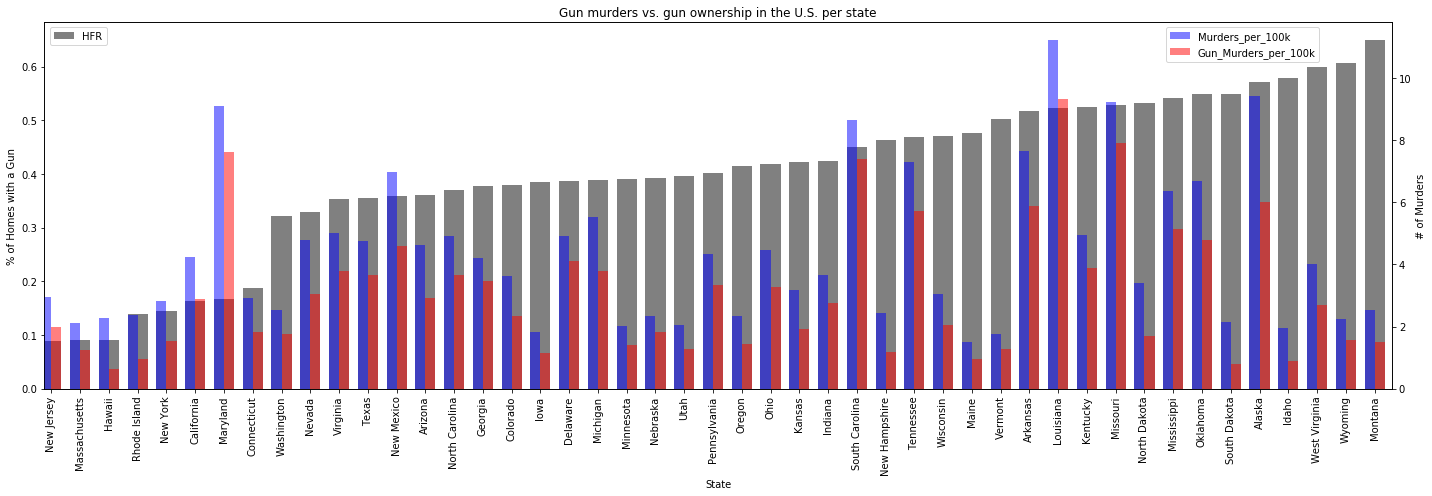

In [11]:

width = 0.35  # the width of the bars

fig = plt.figure(figsize=(20,7))

ax= fig.add_subplot(111)
ax2 = ax.twinx()

fox_data.sort_values(by=['HFR']).plot(x='State', y='HFR',kind='bar', color='grey', ax=ax, width=width*2, align='center')
fox_data.sort_values(by=['HFR']).plot(x='State', y='Murders_per_100k',kind='bar', color='blue', ax=ax2, width=width,position=1,alpha=.5)
fox_data.sort_values(by=['HFR']).plot(x='State', y='Gun_Murders_per_100k',kind='bar', color='red', ax=ax2, width=width,position=0, alpha=.5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of Homes with a Gun')
ax2.set_ylabel('# of Murders')
ax.set_title('Gun murders vs. gun ownership in the U.S. per state')
ax.legend(bbox_to_anchor=(.05, 1))
ax2.legend(bbox_to_anchor=(.95, 1))


fig.tight_layout()

plt.show()

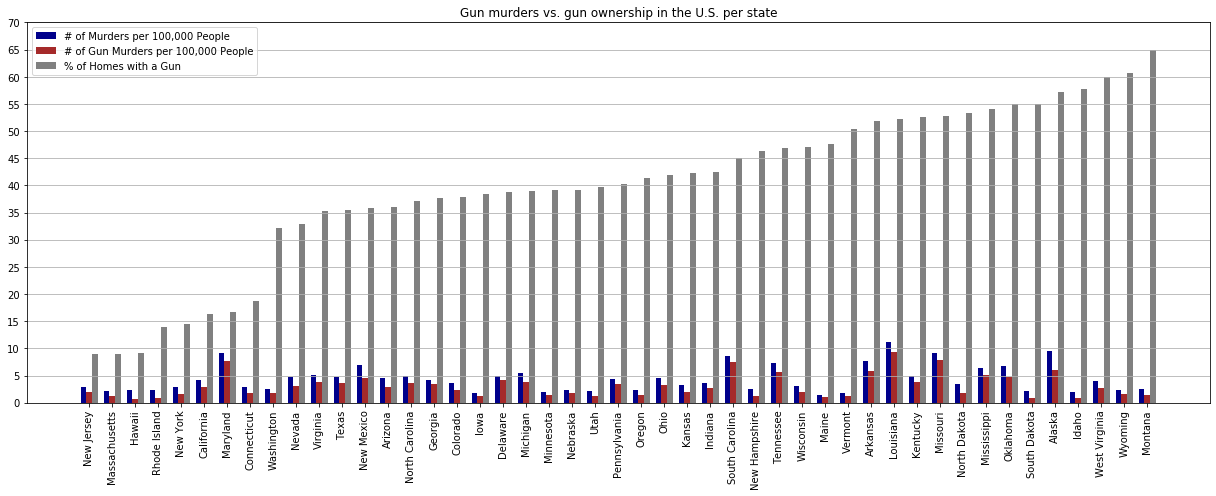

In [12]:
labels = list(fox_data.sort_values(by=['HFR']).State)
murders = fox_data.sort_values(by=['HFR']).Murders_per_100k
gun_murders = fox_data.sort_values(by=['HFR']).Gun_Murders_per_100k
homes = fox_data.sort_values(by=['HFR']).HFR_per

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig = plt.figure(figsize=(17,7))

ax= fig.add_subplot(111)

rects1 = ax.bar(x - width, murders, width, label='# of Murders per 100,000 People', color='darkblue')
rects2 = ax.bar(x, gun_murders, width, label='# of Gun Murders per 100,000 People', color='brown')
rects3 = ax.bar(x + width, homes, width, label='% of Homes with a Gun', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Gun murders vs. gun ownership in the U.S. per state')
ax.set_yticks(np.arange(0, 75, 5))
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.grid(axis='y')
ax.legend()
fig.tight_layout()

plt.show()

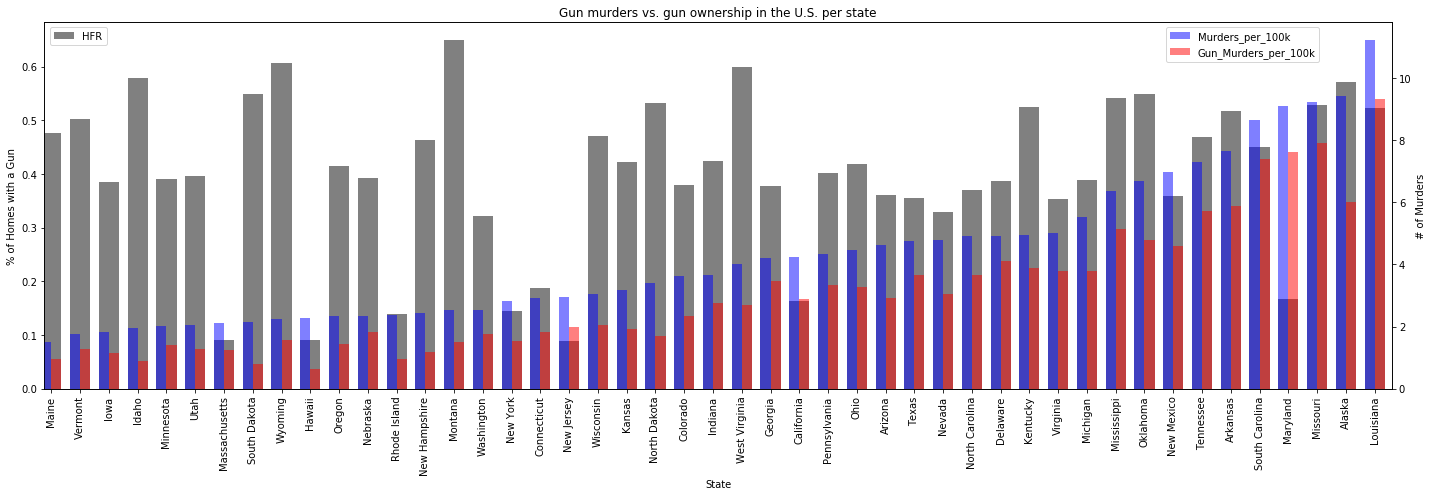

In [13]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(20,7))

ax= fig.add_subplot(111)
ax2 = ax.twinx()

fox_data.sort_values(by=['Murders_per_100k']).plot(x='State', y='HFR',kind='bar', color='grey', ax=ax, width=width*2, align='center')
fox_data.sort_values(by=['Murders_per_100k']).plot(x='State', y='Murders_per_100k',kind='bar', color='blue', ax=ax2, width=width,position=1,alpha=.5)
fox_data.sort_values(by=['Murders_per_100k']).plot(x='State', y='Gun_Murders_per_100k',kind='bar', color='red', ax=ax2, width=width,position=0, alpha=.5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of Homes with a Gun')
ax2.set_ylabel('# of Murders')
ax.set_title('Gun murders vs. gun ownership in the U.S. per state')
ax.legend(bbox_to_anchor=(.05, 1))
ax2.legend(bbox_to_anchor=(.95, 1))


fig.tight_layout()

plt.show()

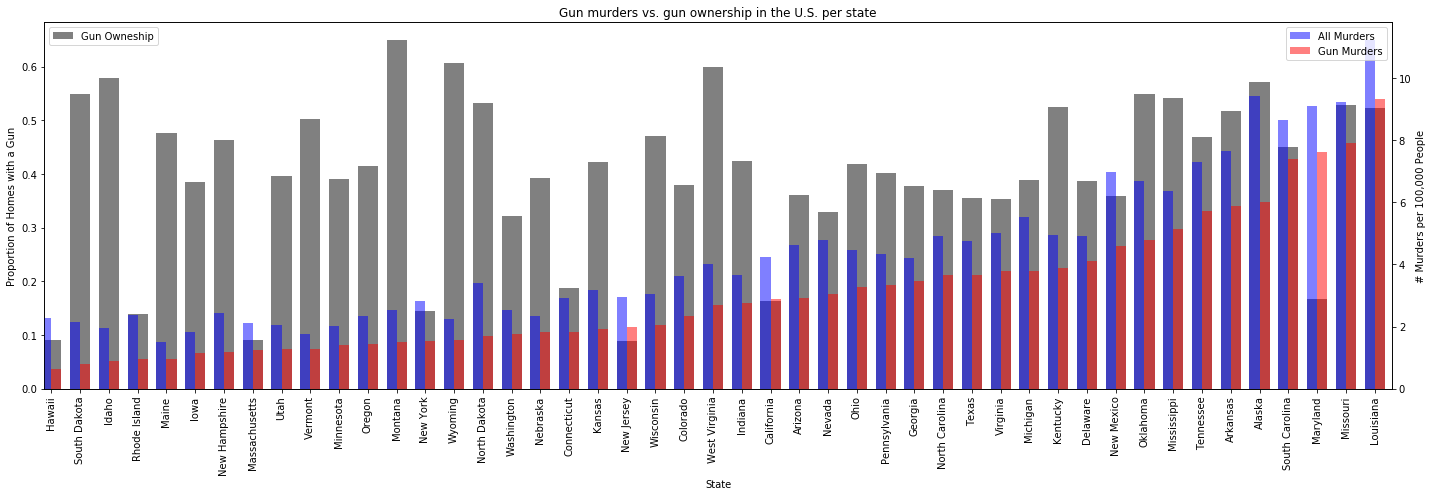

In [14]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(20,7))

ax= fig.add_subplot(111)
ax2 = ax.twinx()

fox_data.sort_values(by=['Gun_Murders_per_100k']).plot(x='State', y='HFR',kind='bar', color='grey', ax=ax, width=width*2, align='center', label='Gun Owneship')
fox_data.sort_values(by=['Gun_Murders_per_100k']).plot(x='State', y='Murders_per_100k',kind='bar', color='blue', ax=ax2, width=width,position=1,alpha=.5, label='All Murders')
fox_data.sort_values(by=['Gun_Murders_per_100k']).plot(x='State', y='Gun_Murders_per_100k',kind='bar', color='red', ax=ax2, width=width,position=0, alpha=.5, label='Gun Murders')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of Homes with a Gun')
ax2.set_ylabel('# Murders per 100,000 People')
ax.set_title('Gun murders vs. gun ownership in the U.S. per state')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')


fig.tight_layout()

plt.show()

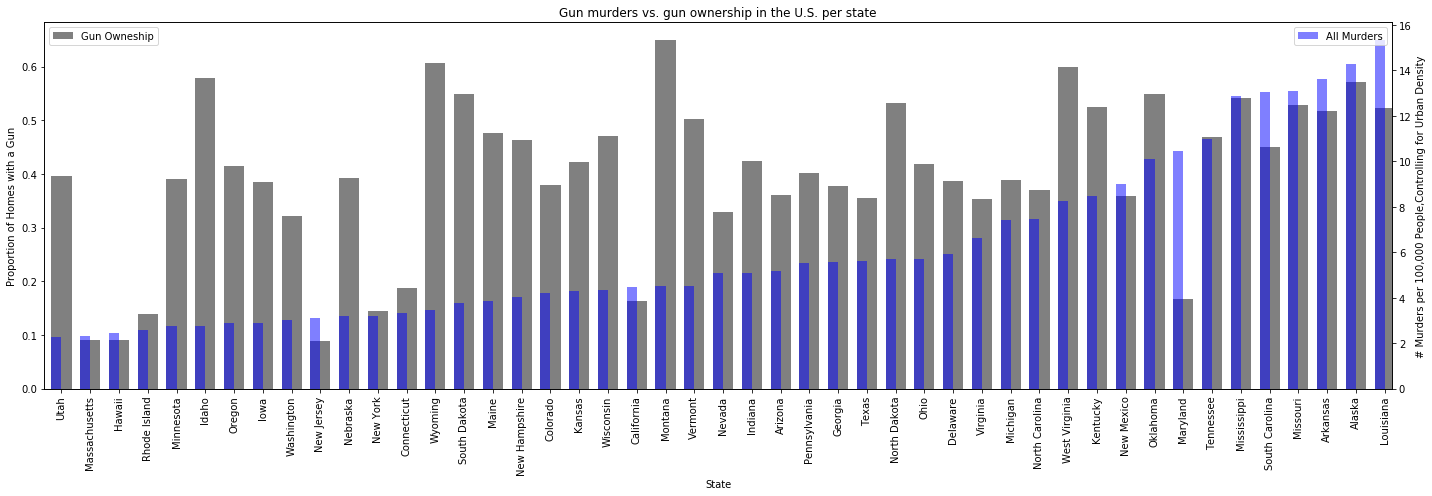

In [44]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(20,7))

ax= fig.add_subplot(111)
ax2 = ax.twinx()

fox_data.sort_values(by=['Urb_Murd']).plot(x='State', y='HFR',kind='bar', color='grey', ax=ax, width=width*2, align='center', label='Gun Owneship')
fox_data.sort_values(by=['Urb_Murd']).plot(x='State', y='Urb_Murd',kind='bar', color='blue', ax=ax2, width=width,position=1,alpha=.5, label='All Murders')
#fox_data.sort_values(by=['Urb_Murd']).plot(x='State', y='Gun_Murders_per_100k',kind='bar', color='red', ax=ax2, width=width,position=0, alpha=.5, label='Gun Murders')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of Homes with a Gun')
ax2.set_ylabel('# Murders per 100,000 People,Controlling for Urban Density')
ax.set_title('Gun murders vs. gun ownership in the U.S. per state')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')


fig.tight_layout()

plt.show()

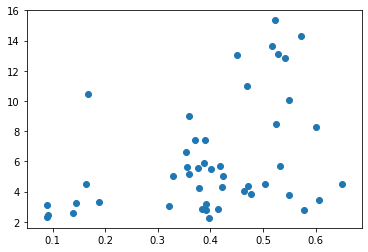

In [40]:
plt.scatter(fox_data.HFR,fox_data.Murders_per_100k/(fox_data.Urban_per/100))